## Spreadsheet Analysis 

In [31]:
import csv
with open('sales.csv', 'r') as sales:
    spreadsheet=csv.DictReader(sales)
    
    sales_list=[]
    
    for entry in spreadsheet:
        sale=int(entry['sales'])
        sales_list.append(sale)
        sales_tot=sum(sales_list)
    print(f'The total sales for all the months are {sales_tot}.')

The total sales for all the months are 45542.


Month: jan, Sales: 6226
Month: feb, Sales: 1521
Month: mar, Sales: 1842
Month: apr, Sales: 2051
Month: may, Sales: 1728
Month: jun, Sales: 2138
Month: jul, Sales: 7479
Month: aug, Sales: 4434
Month: sep, Sales: 3615
Month: oct, Sales: 5472
Month: nov, Sales: 7224
Month: dec, Sales: 1812
[('jan', '6226'), ('feb', '1521'), ('mar', '1842'), ('apr', '2051'), ('may', '1728'), ('jun', '2138'), ('jul', '7479'), ('aug', '4434'), ('sep', '3615'), ('oct', '5472'), ('nov', '7224'), ('dec', '1812')]
Sales summary has been saved as 'sales_summary.csv'.


<Axes: xlabel='Month', ylabel='Sales'>

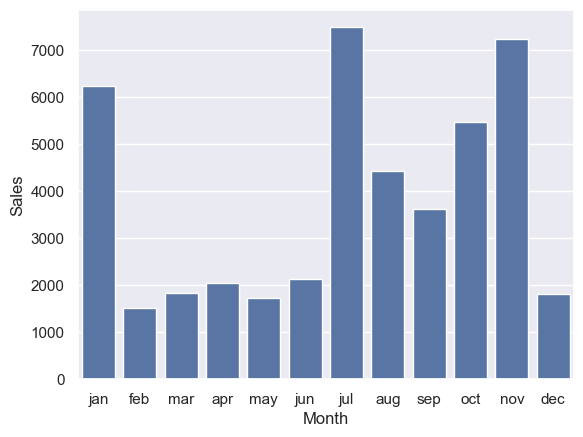

In [63]:
#OUTPUT MONTHLY SALES#
import csv

with open("sales.csv", "r") as sales_file:
    spreadsheet = csv.DictReader(sales_file)
    #TO STORE monthly sales with their respective month
    sales_summary = []
    for row in spreadsheet:
        month = row['month']  #Get the month
        monthly_sales = row['sales']  #Get the sales
        sales_summary.append((month, monthly_sales)) #Add the month and sales as a tuple

#Display the monthly sales
for month, sale in sales_summary:
    print(f"Month: {month}, Sales: {sale}")

print(sales_summary)

#OUTPUT SUMMARY TO SPREADSHEETS. Saved in the same folder#

with open("sales_summary.csv", "w", newline="") as summary_file:
    writer = csv.writer(summary_file)

    #Write the header
    writer.writerow(["Month", "Sales"])

    #Write the data
    for month, sales in sales_summary:
        writer.writerow([month, sales])

print("Sales summary has been saved as 'sales_summary.csv'.")


### VISUALIZATION ###

import seaborn as sns
import matplotlib as plt
import pandas as pd
sns.set_theme()

#generate a bar plot of monthly sales
df_summary=pd.read_csv('sales_summary.csv')
sns.barplot(x='Month', y= 'Sales', data=df_summary)



In [25]:
import numpy as np
count=df_summary['Sales'].count()
mean=df_summary['Sales'].mean()
minimum=df_summary['Sales'].min().index()
maximum=df_summary['Sales'].max()

print(f'The mean of the sales across the 12 months was {mean}.\nThe maximum sales were reached in july and were {maximum}.\nThe minimum sales were reached in february and were {minimum}.')

The mean of the sales across the 12 months was 3795.1666666666665.
The maximum sales were reached in july and were 7479.
The minimum sales were reached in february and were 1521.


<Axes: ylabel='Sales'>

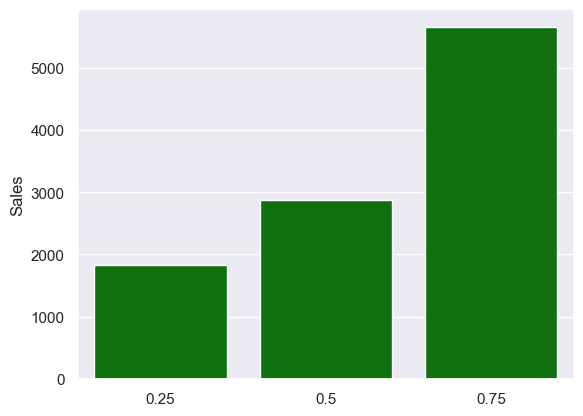

In [20]:
x=df_summary['Sales'].quantile([.25, .5, .75])

sns.barplot(x, color='green')

In [64]:
# CALCULATIONS, NEW VARIABLES, AND ADDITION TO A NEW CSV

import csv

# Read the sales data from the CSV file
with open("sales.csv", "r") as sales_file:
    spreadsheet = csv.DictReader(sales_file)

    # To store monthly data with profit and changes
    data = []

    previous_sales = None
    previous_expenditure = None

    # Read the data and calculate profit, percentage profit, and monthly changes
    for row in spreadsheet:
        month = row['month']
        sales = float(row['sales'])
        expenditure = float(row['expenditure'])
        year = row['year']

        # Calculate profit and percentage profit
        profit = sales - expenditure
        percent_profit = round((profit / expenditure) * 100, 1) if expenditure != 0 else 0  # 1 decimal point

        # Initialize changes to 0 for the first row (no previous month)
        if previous_sales is None or previous_expenditure is None:
            change_in_sales = 0
            change_in_expenditure = 0
        else:
            # Calculate changes with 1 decimal point
            change_in_sales = round(((sales - previous_sales) / previous_sales) * 100, 1) if previous_sales != 0 else 0
            change_in_expenditure = round(((expenditure - previous_expenditure) / previous_expenditure) * 100, 1) if previous_expenditure != 0 else 0

        # Append data for each row, including the change calculations
        data.append({
            'year': year,
            'month': month,
            'sales': int(sales),  # Convert to integer
            'expenditure': int(expenditure),  # Convert to integer
            'profit': int(profit),  # Convert to integer
            'percent_profit': percent_profit,  # Store the value as a number (no % symbol)
            'change_in_sales': change_in_sales,  # Store the calculated change in sales
            'change_in_expenditure': change_in_expenditure  # Store the calculated change in expenditure
        })

        # Update previous sales and expenditure for the next iteration
        previous_sales = sales
        previous_expenditure = expenditure

# Output the results to a new CSV file
with open("sales_summary_with_changes.csv", "w", newline="") as summary_file:
    fieldnames = ['year', 'month', 'sales', 'expenditure', 'profit', 'percent_profit', 'change_in_sales', 'change_in_expenditure']
    writer = csv.DictWriter(summary_file, fieldnames=fieldnames)

    # Write the header
    writer.writeheader()

    # Write the data
    for row in data:
        writer.writerow(row)

print("Sales summary with profit, changes, and year has been written to 'sales_summary_with_changes.csv'.")

Sales summary with profit, changes, and year has been written to 'sales_summary_with_changes.csv'.


In [65]:
# DATA PROCESSING

df_summary_with_changes=pd.read_csv('sales_summary_with_changes.csv')

clean_df_summary_with_changes=df_summary_with_changes.dropna()

df_summary_with_changes.head()

,year,month,sales,expenditure,profit,percent_profit,change_in_sales,change_in_expenditure
0,2018,jan,6226,3808,2418,63.5,0.0,0.0
1,2018,feb,1521,3373,-1852,-54.9,-75.6,-11.4
2,2018,mar,1842,3965,-2123,-53.5,21.1,17.6
3,2018,apr,2051,1098,953,86.8,11.3,-72.3
4,2018,may,1728,3046,-1318,-43.3,-15.7,177.4


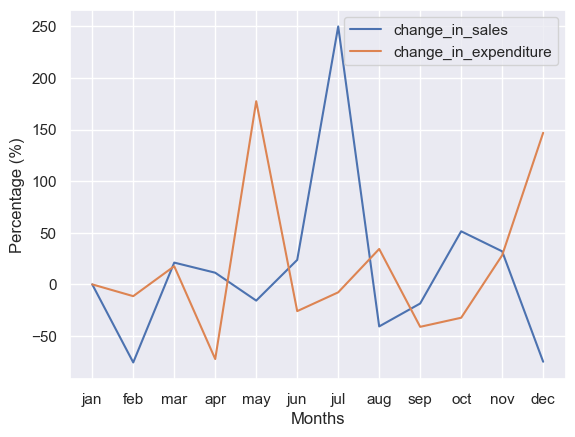

In [66]:
# VISUALIZATION 1

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Apply the default theme
sns.set_theme()

#plot line plots of change_in_sales and change_in_expenditure
sns.lineplot(data=clean_df_summary_with_changes,x='month', y='change_in_sales', label='change_in_sales')
sns.lineplot(data=clean_df_summary_with_changes, x='month', y='change_in_expenditure', label='change_in_expenditure')
plt.xlabel('Months')
plt.ylabel('Percentage (%)')
plt.legend()
plt.show()

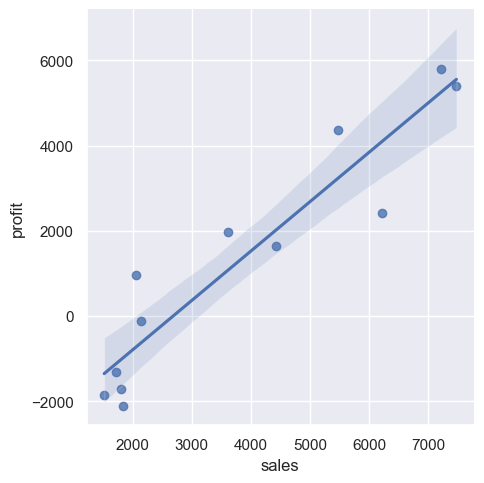

In [67]:
# VISUALIZATION 2

sns.lmplot(data=clean_df_summary_with_changes,x='sales', y='profit')